In [1]:
from pandas import read_csv
data = read_csv("../input/horse.csv")

In [2]:
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [3]:
data.isnull().any()

surgery                  False
age                      False
hospital_number          False
rectal_temp               True
pulse                     True
respiratory_rate          True
temp_of_extremities       True
peripheral_pulse          True
mucous_membrane           True
capillary_refill_time     True
pain                      True
peristalsis               True
abdominal_distention      True
nasogastric_tube          True
nasogastric_reflux        True
nasogastric_reflux_ph     True
rectal_exam_feces         True
abdomen                   True
packed_cell_volume        True
total_protein             True
abdomo_appearance         True
abdomo_protein            True
outcome                  False
surgical_lesion          False
lesion_1                 False
lesion_2                 False
lesion_3                 False
cp_data                  False
dtype: bool

In [4]:
def get_feature_lists_by_dtype(data):
    output = {}
    for f in data.columns:
        dtype = str(data[f].dtype)
        if dtype not in output.keys(): output[dtype] = [f]
        else: output[dtype] += [f]
    return output

def show_uniques(data,features):
    for f in features:
        if len(data[f].unique()) < 30:
            print("%s: count(%s) %s" % (f,len(data[f].unique()),data[f].unique()))
        else:
            print("%s: count(%s/%s) %s" % (f,len(data[f].unique()),len(data),data[f].unique()[0:10]))

def show_all_uniques(data):
    dtypes = get_feature_lists_by_dtype(data)
    for key in dtypes.keys():
        print(key + "\n")
        show_uniques(data,dtypes[key])
        print()

In [5]:
show_all_uniques(data)

object

surgery: count(2) ['no' 'yes']
age: count(2) ['adult' 'young']
temp_of_extremities: count(5) ['cool' nan 'normal' 'cold' 'warm']
peripheral_pulse: count(5) ['reduced' nan 'normal' 'absent' 'increased']
mucous_membrane: count(7) [nan 'pale_cyanotic' 'pale_pink' 'dark_cyanotic' 'normal_pink' 'bright_red'
 'bright_pink']
capillary_refill_time: count(4) ['more_3_sec' 'less_3_sec' nan '3']
pain: count(6) ['extreme_pain' 'mild_pain' 'depressed' nan 'severe_pain' 'alert']
peristalsis: count(5) ['absent' 'hypomotile' nan 'hypermotile' 'normal']
abdominal_distention: count(5) ['severe' 'slight' 'none' nan 'moderate']
nasogastric_tube: count(4) [nan 'none' 'slight' 'significant']
nasogastric_reflux: count(4) [nan 'less_1_liter' 'none' 'more_1_liter']
rectal_exam_feces: count(5) ['decreased' 'absent' 'normal' nan 'increased']
abdomen: count(6) ['distend_large' 'other' 'normal' nan 'firm' 'distend_small']
abdomo_appearance: count(4) [nan 'cloudy' 'serosanguious' 'clear']
outcome: count(3) 

In [6]:
dtype = get_feature_lists_by_dtype(data)

In [7]:
categories = dtype["object"]

In [8]:
counts = ["lesion_2", "lesion_3"]

In [9]:
numerics = dtype["float64"] + dtype["int64"]

----------


In [10]:
from seaborn import distplot, boxplot, countplot, set_style,despine, axes_style, set_palette, color_palette
from matplotlib.pyplot import subplot, show
from IPython.display import display
from pandas import DataFrame

# === Numeric Analysis === #

def numeric_analysis(series):
    
    no_nulls = series.dropna()
    
    with axes_style({"axes.grid": False}):
        
        cell_1 = subplot(211)
        dp = distplot(no_nulls, kde=False)
        dp.set_xlabel("",visible=False)
        dp.set_yticklabels(dp.get_yticklabels(),visible=False)
        despine(left = True)

        cell_2 = subplot(212, sharex=cell_1)
        boxplot(no_nulls)
        despine(left=True)
    
    show()
    
    display(DataFrame(series.describe().round(2)).T)

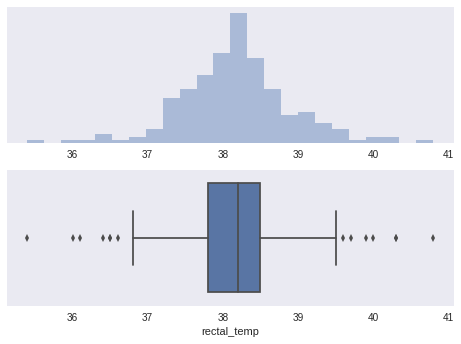

,count,mean,std,min,25%,50%,75%,max
rectal_temp,239.0,38.17,0.73,35.4,37.8,38.2,38.5,40.8


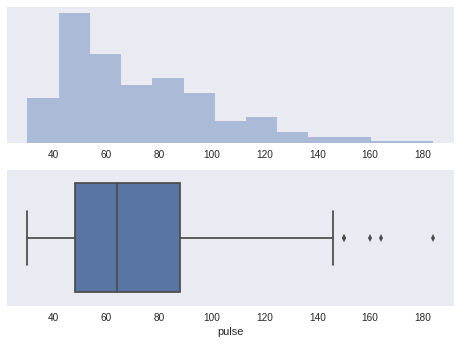

,count,mean,std,min,25%,50%,75%,max
pulse,275.0,72.0,28.65,30.0,48.0,64.0,88.0,184.0


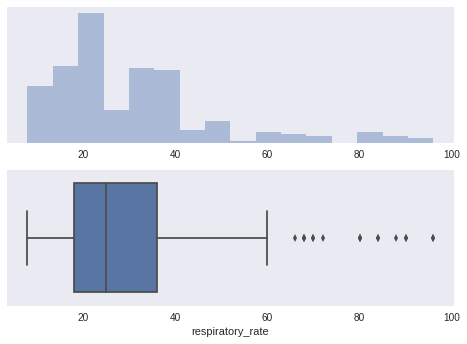

,count,mean,std,min,25%,50%,75%,max
respiratory_rate,241.0,30.46,17.67,8.0,18.0,25.0,36.0,96.0


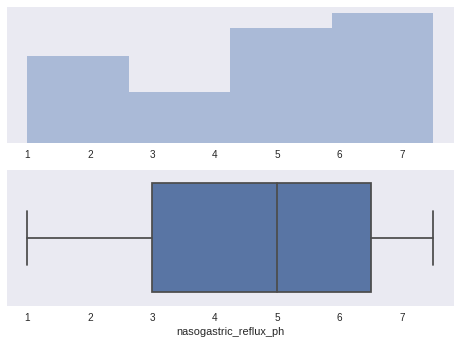

,count,mean,std,min,25%,50%,75%,max
nasogastric_reflux_ph,53.0,4.71,1.98,1.0,3.0,5.0,6.5,7.5


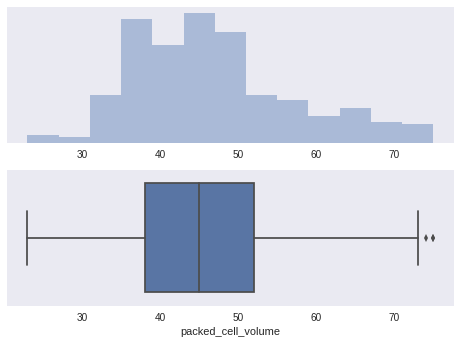

,count,mean,std,min,25%,50%,75%,max
packed_cell_volume,270.0,46.31,10.44,23.0,38.0,45.0,52.0,75.0


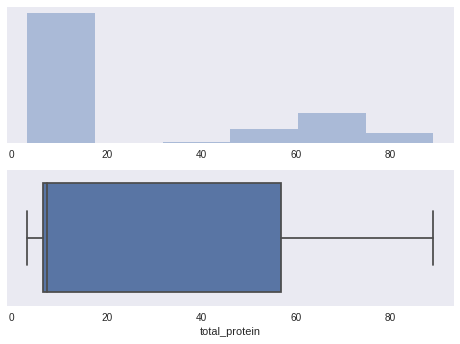

,count,mean,std,min,25%,50%,75%,max
total_protein,266.0,24.27,27.36,3.3,6.5,7.5,56.75,89.0


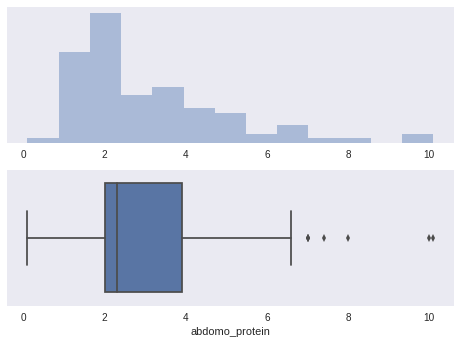

,count,mean,std,min,25%,50%,75%,max
abdomo_protein,101.0,3.04,1.97,0.1,2.0,2.3,3.9,10.1


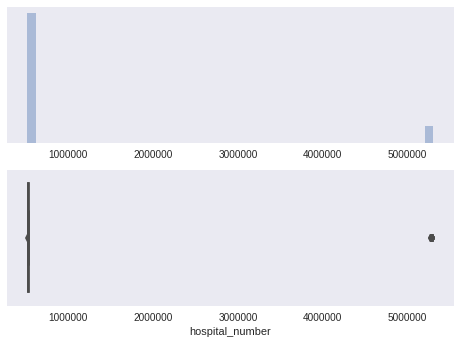

,count,mean,std,min,25%,50%,75%,max
hospital_number,299.0,1087732.7,1532031.58,518476.0,528904.0,530301.0,534736.0,5305629.0


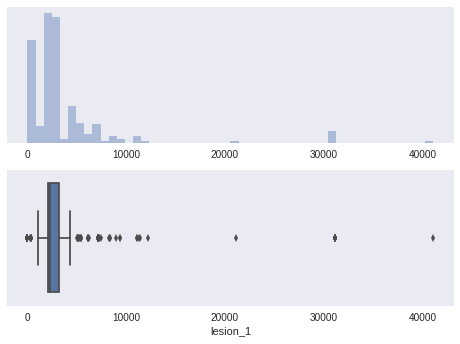

,count,mean,std,min,25%,50%,75%,max
lesion_1,299.0,3659.71,5408.47,0.0,2111.5,2322.0,3209.0,41110.0


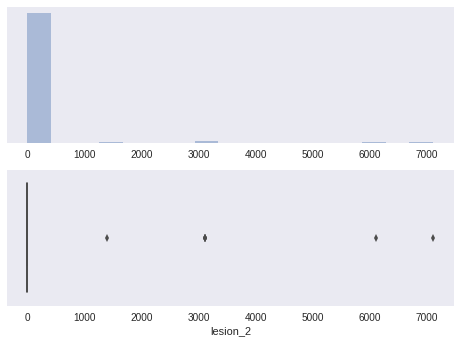

,count,mean,std,min,25%,50%,75%,max
lesion_2,299.0,90.53,650.64,0.0,0.0,0.0,0.0,7111.0


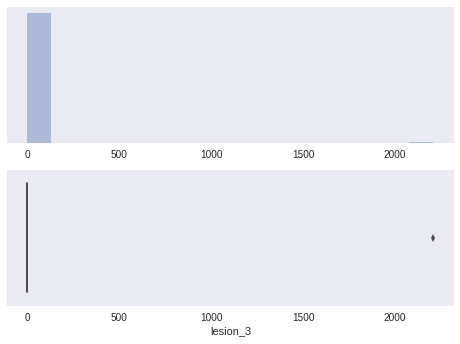

,count,mean,std,min,25%,50%,75%,max
lesion_3,299.0,7.39,127.75,0.0,0.0,0.0,0.0,2209.0


In [11]:
for numeric in numerics: numeric_analysis(data[numeric])

----------


In [27]:
# ===  Category Analysis === #

from seaborn import countplot, set_style, color_palette, despine
from matplotlib.pyplot import show
from IPython.display import display
from pandas import DataFrame
from scipy.stats import chisquare

def category_analysis(series):
    
    set_style("whitegrid")
    set_style({'axes.grid': False})
        
    if series.unique().size > 10:
        
        ax = countplot(data=series, palette=color_palette("colorblind"))
        ax.set_title(ax.get_ylabel())
        
        last_tick = int(round(ax.get_yticks()[-1]/len(series),1) * 10) + 1
        ax.set_yticks([i * (len(series) * 0.1) for i in range(0,last_tick)])
        ax.set_yticklabels(["{:.0f}%".format((tick / len(series)) * 100) for tick in ax.get_yticks()])
        
        despine(left=True)
        show()
        display(DataFrame(series.value_counts()).T)
        
    else:
    
        set_style("whitegrid")
        set_palette = color_palette("colorblind")
        
        ax = countplot(series, palette=color_palette("colorblind"))
        
        last_tick = int(round(ax.get_yticks()[-1]/len(series),1) * 10) + 1
        ax.set_yticks([i * (len(series) * 0.1) for i in range(0,last_tick)])
        ax.set_yticklabels(["{:.0f}%".format((tick / len(series)) * 100) for tick in ax.get_yticks()])
        
        maximum_yticklabel_length = max([len(str(x)) for x in series.unique()])
        
        if maximum_yticklabel_length in range (5,7):
            ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
        elif maximum_yticklabel_length > 6:
            ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
            
        ax.set_title(ax.get_xlabel())
        ax.set_xlabel("",visible=False)
            
        despine(left=True)
    
    show()
    
    display(DataFrame(series.value_counts()).T)
    
    statistic, p = chisquare(series.value_counts())
    chisq = {"statistic" : statistic, "p-value" : p.round(2)}
    
    display(DataFrame(index=["Chi Square"], data=chisq)[["statistic","p-value"]])

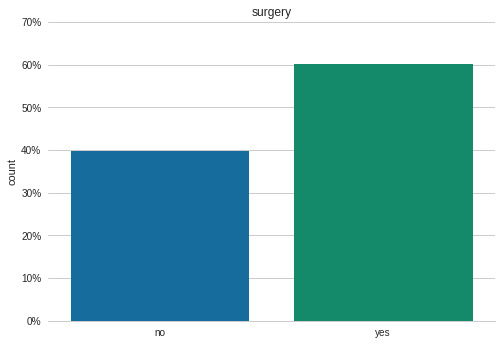

,yes,no
surgery,180,119


,statistic,p-value
Chi Square,12.444816,0.0


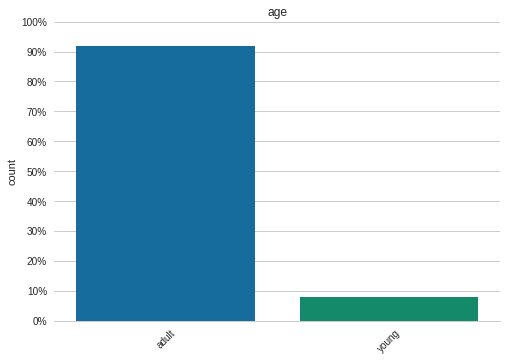

,adult,young
age,275,24


,statistic,p-value
Chi Square,210.705686,0.0


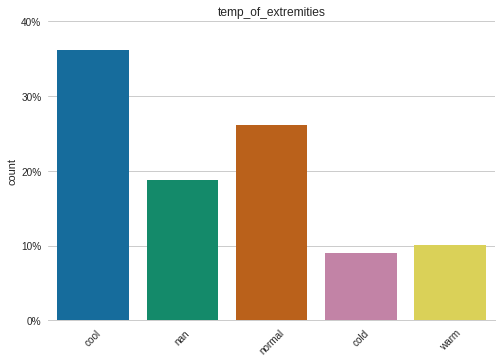

,cool,normal,nan,warm,cold
temp_of_extremities,108,78,56,30,27


,statistic,p-value
Chi Square,77.471572,0.0


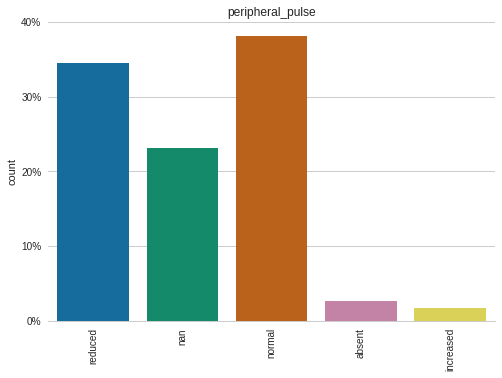

,normal,reduced,nan,absent,increased
peripheral_pulse,114,103,69,8,5


,statistic,p-value
Chi Square,176.83612,0.0


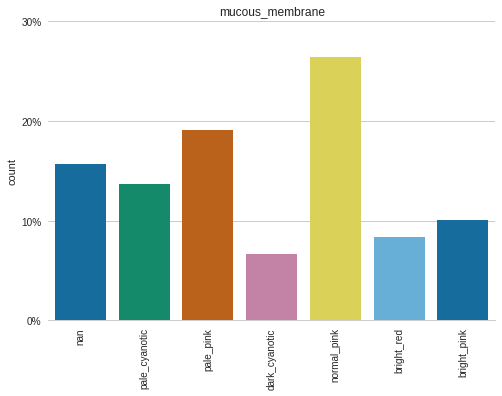

,normal_pink,pale_pink,nan,pale_cyanotic,bright_pink,bright_red,dark_cyanotic
mucous_membrane,79,57,47,41,30,25,20


,statistic,p-value
Chi Square,59.311037,0.0


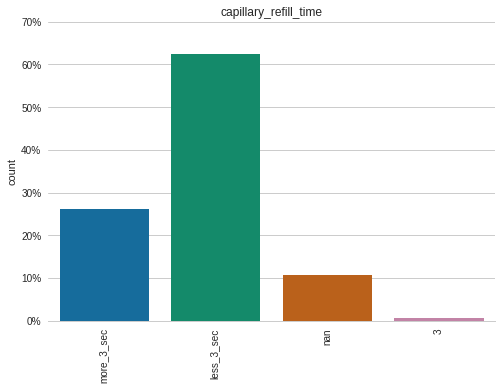

,less_3_sec,more_3_sec,nan,3
capillary_refill_time,187,78,32,2


,statistic,p-value
Chi Square,263.956522,0.0


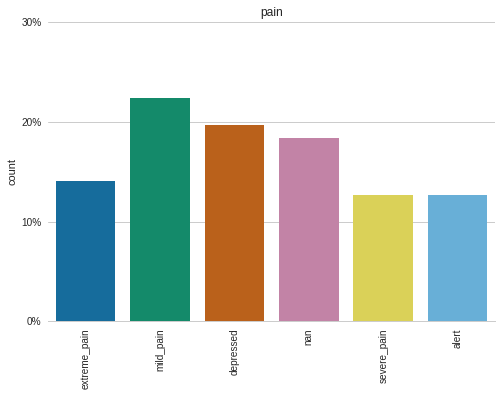

,mild_pain,depressed,nan,extreme_pain,severe_pain,alert
pain,67,59,55,42,38,38


,statistic,p-value
Chi Square,14.986622,0.01


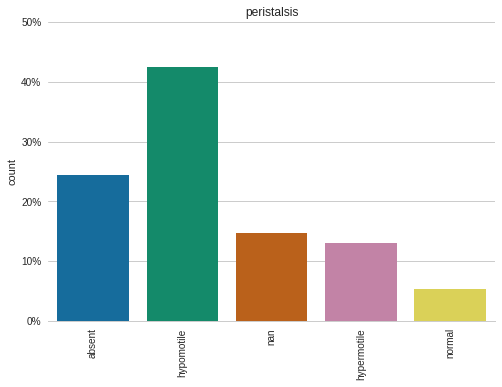

,hypomotile,absent,nan,hypermotile,normal
peristalsis,127,73,44,39,16


,statistic,p-value
Chi Square,121.919732,0.0


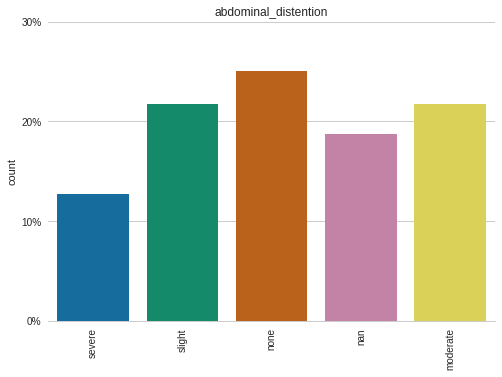

,none,slight,moderate,nan,severe
abdominal_distention,75,65,65,56,38


,statistic,p-value
Chi Square,12.956522,0.01


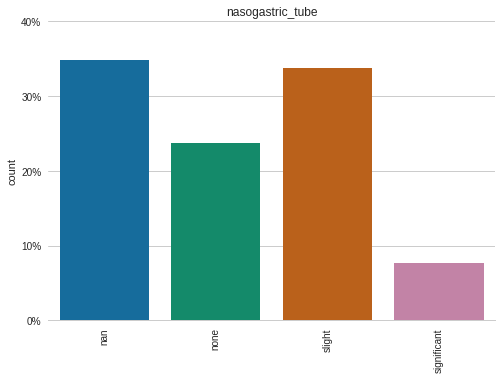

,nan,slight,none,significant
nasogastric_tube,104,101,71,23


,statistic,p-value
Chi Square,56.67893,0.0


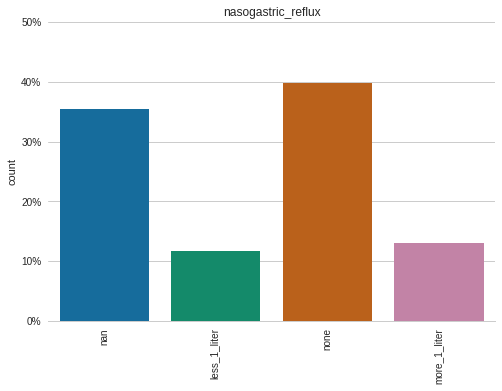

,none,nan,more_1_liter,less_1_liter
nasogastric_reflux,119,106,39,35


,statistic,p-value
Chi Square,77.494983,0.0


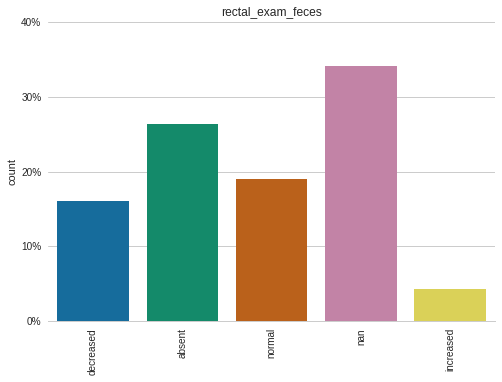

,nan,absent,normal,decreased,increased
rectal_exam_feces,102,79,57,48,13


,statistic,p-value
Chi Square,75.0301,0.0


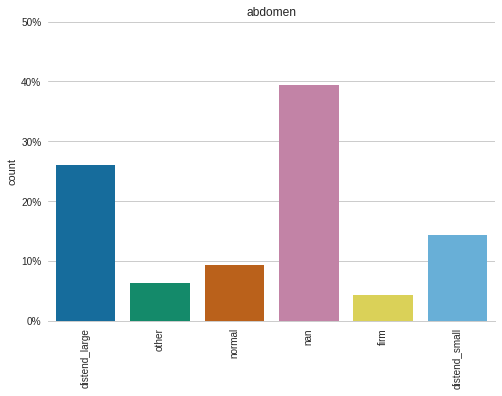

,nan,distend_large,distend_small,normal,other,firm
abdomen,118,78,43,28,19,13


,statistic,p-value
Chi Square,165.9699,0.0


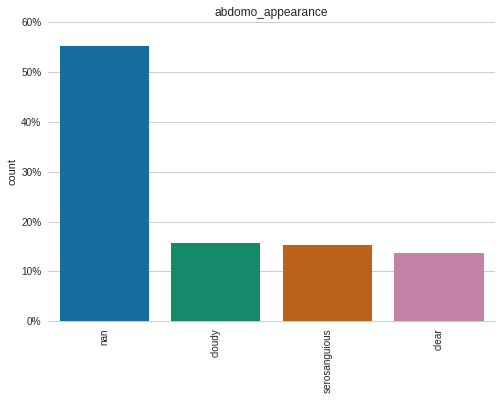

,nan,cloudy,serosanguious,clear
abdomo_appearance,165,47,46,41


,statistic,p-value
Chi Square,145.561873,0.0


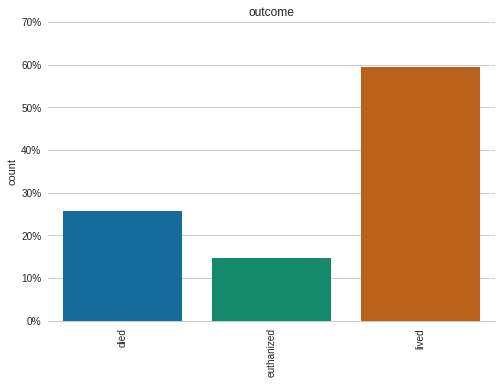

,lived,died,euthanized
outcome,178,77,44


,statistic,p-value
Chi Square,97.812709,0.0


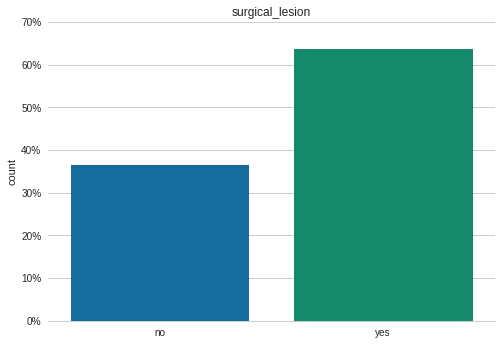

,yes,no
surgical_lesion,190,109


,statistic,p-value
Chi Square,21.943144,0.0


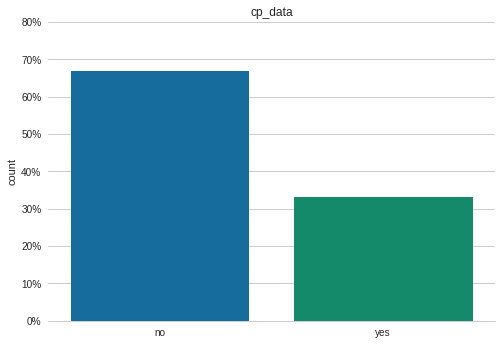

,no,yes
cp_data,200,99


,statistic,p-value
Chi Square,34.117057,0.0


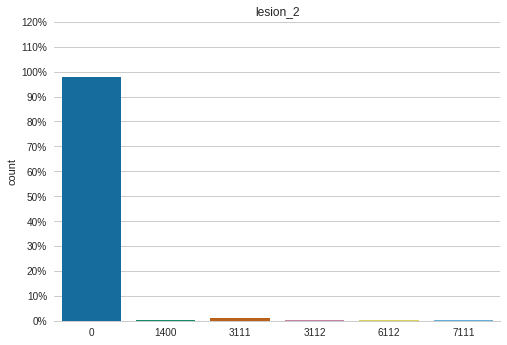

,0,3111,3112,7111,1400,6112
lesion_2,292,3,1,1,1,1


,statistic,p-value
Chi Square,1412.244147,0.0


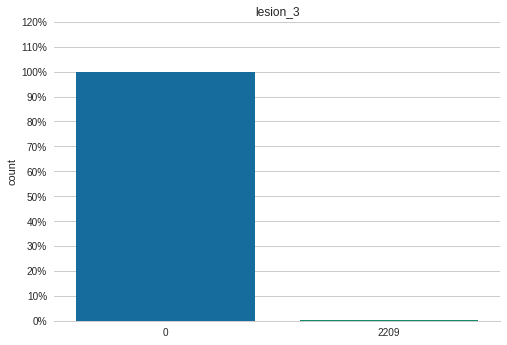

,0,2209
lesion_3,298,1


,statistic,p-value
Chi Square,295.013378,0.0


In [28]:
for category in categories + counts: category_analysis(data[category].apply(str))